# Információ kinyerése arcokból mélyneurális hálókkal

## Előkészületek

Hivatkozzuk be nem csak az eddig felhasznált könyvtárakat, de a másik notebook fájlt is, ahol az eddig megírt segédosztályok és metódusok vannak.

In [1]:
import sys
sys.path.append('c:\\users\\ifjto\\appdata\\local\\programs\\python\\python37\\lib\\site-packages')
import numpy as np
import import_ipynb
from model import ResidualBlock, NeuralNetwork, MyDataset, get_data, train, classify, validate
import numpy as np
import torch
from torch import nn
from torch.utils.data import *
import torch.optim as optim
import torch.cuda
import torchvision.transforms as transforms
import cv2
import os
import time
from IPython.display import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

importing Jupyter notebook from model.ipynb
CUDA available!


## Nemek osztályozása

Tanuljuk meg nemek szerint osztályozni, a másik notebookban definiált függvény használatával. A hiperparaméterek értékeit nem véletlen próbálgatással, hanem az optimalisation.ipynb futtatása alapján találtam, ami Bayesi optimalizációt használ.

In [2]:
trainloader, testloader, validationloader, frequencies = get_data("gender", ("Male", "Female"), 16)
genderNet, stats, losses = train(nC=2, nFeat=9, nLevels=5, layersPerLevel=3, kernelSize=9, dropout=0.4804,
                                 trainloader=trainloader, testloader=testloader, lr=pow(10, -3.846),
                                 wd=pow(10, -7.811), numEpoch=30, frequencies=frequencies)

Encountered Transgender 3 times but it isn't accepted
Male is 76.13% of data
Female is 23.87% of data
Dataset of  4738  records initialised.
30 / 30	balanced accuracy: 86.8%	loss: 0.1577
Finished training after  1488  seconds


Rajzoljuk ki, hogyan tanul rá a háló a tanulóadatokra, és hogyan javul a teljesítménye a tesztadatokon.

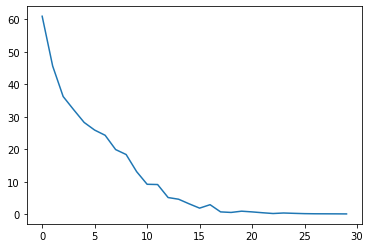

In [3]:
plt.plot(losses)

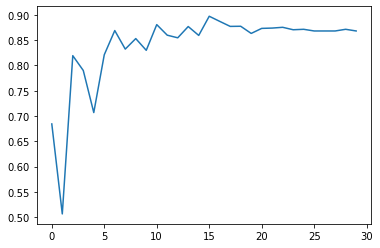

In [4]:
plt.plot(stats)

Nézzük meg, hogy a validációs adatokon milyen eredményt ér el. Ez azért fontos, mert a hiperparaméterek állítgatásával ugyan jó eredményt érhetünk el a tesztadatokon, de ezzel "össze is koszoljuk" azt.

In [5]:
result = validate(genderNet, validationloader, ("Male", "Female"))
print(result)

Accuracy: 92.3944%
Accuracy for balanced classes: 88.09%
Best 1 accuracy: 92.3944%
Best 1 accuracy for balanced classes: 88.09%
	Male	Femal
Male	96.63	3.37	
Femal	20.45	79.55	



Ezek után megpróbálom, milyen eredményt ad a saját arcomra... A legnagyobb kapott érték a háló által tippelt eredmény, de az érdekesség kedvéért minden eredményt kiiratok, így nem csak az látszik, hogy férfinak vagy nőnek tippel, hanem az is, hogy mennyire biztos a döntésében.

In [8]:
classify("me.jpg", genderNet, ("Male", "Female"))

Male:	-0.03114898130297661
Female:	-0.40925878286361694



## Foglalkozáskörök osztályozása

Az előzöekben kipróbáltuk az összes függvényt, és lefutattunk egy teljes osztályozást. Most próbáljunk meg mást is osztályozni. Az osztályozandó adat legyen a munkakör. Mivel jól írtam meg az osztályokat és metódusokat, így néhány sor elég most is.

In [2]:
accepted_values = ("Star", "Sciences", "Sports", "Arts", "Business/politics", "Military", "Religion", 
                  "Crime", "Music", "Law")
trainloader, testloader, validationloader, frequencies = get_data("occupation_category", accepted_values, 32)

Encountered None 99 times but it isn't accepted
Star is 40.56% of data
Sciences is 7.88% of data
Sports is 2.87% of data
Arts is 14.17% of data
Business/politics is 23.31% of data
Military is 1.4% of data
Religion is 1.44% of data
Crime is 1.42% of data
Music is 5.73% of data
Law is 1.21% of data
Dataset of  4642  records initialised.


In [3]:
occupationNet, stats, losses = train(nC=len(accepted_values), nFeat=21, nLevels=5, layersPerLevel=3, kernelSize=9,
                               dropout=0.10388419665685261, trainloader=trainloader, testloader=testloader,
                               lr=pow(10, -4.634232320937716), wd=pow(10, -8.669600781396264), numEpoch=30,
                               frequencies=frequencies)

30 / 30	balanced accuracy: 13.8%	loss: 0.191
Finished training after  4739  seconds


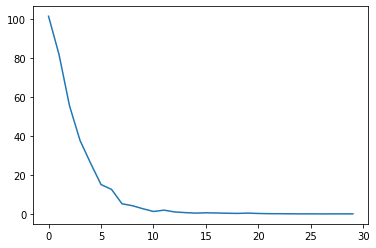

In [4]:
plt.plot(losses)

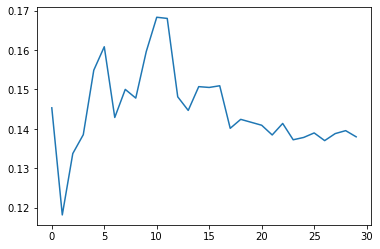

In [5]:
plt.plot(stats)

In [6]:
result = validate(occupationNet, validationloader, accepted_values, best_num=3)
print(result)
classify("me.jpg", occupationNet, accepted_values)

Accuracy: 38.6494%
Accuracy for balanced classes: 20.9%
Best 3 accuracy: 52.8736%
Best 3 accuracy for balanced classes: 41.61%
	Star	Scien	Sport	Arts	Busin	Milit	Relig	Crime	Music	Law
Star	66.78	0.71	4.59	5.65	6.71	2.83	3.18	4.59	0.71	4.24	
Scien	24.44	6.67	0.0	13.33	28.89	2.22	11.11	4.44	2.22	6.67	
Sport	26.09	0.0	34.78	0.0	21.74	0.0	8.7	4.35	0.0	4.35	
Arts	37.62	10.89	8.91	7.92	10.89	5.94	7.92	2.97	0.0	6.93	
Busin	18.75	5.62	9.38	5.62	34.38	6.25	6.25	5.0	0.62	8.12	
Milit	0.0	11.11	11.11	22.22	33.33	11.11	0.0	11.11	0.0	0.0	
Relig	12.5	0.0	0.0	25.0	0.0	0.0	37.5	12.5	0.0	12.5	
Crime	23.08	7.69	15.38	7.69	23.08	7.69	7.69	7.69	0.0	0.0	
Music	58.7	6.52	8.7	4.35	0.0	2.17	6.52	8.7	2.17	2.17	
Law	37.5	0.0	12.5	0.0	12.5	25.0	12.5	0.0	0.0	0.0	

Star:	0.24989578127861023
Sciences:	1.0941697359085083
Sports:	0.6854268908500671
Arts:	0.13376110792160034
Business/politics:	-0.2992303967475891
Military:	-2.433823585510254
Religion:	-2.515613317489624
Crime:	-1.2801793813705444
Music:	1.6207646131515

## Rasszok felismerése

Ez a feladat meglepően nehéznek bizonyult. Rá kellett jönnöm, hogy a kevert rassz elhagyásával jobb eredményt érhetek el, ráadásul nem is lenne okos megtartani egy lényegében "egyéb" kategóriát. Helyette a kapott eredményekből lehet kitalálni, ha valaki kevert rasszú: mindössze meg kell vizsgálni, hogy milyen közel áll egymáshoz a két legnagyobb prediktált érték.

In [2]:
accepted_values = ("Black", "White", "Asian")
trainloader, testloader, validationloader, frequencies = get_data("race", accepted_values, 16)

Encountered Mixed 218 times but it isn't accepted
Encountered American 9 times but it isn't accepted
Encountered Other 1 times but it isn't accepted
Encountered None 2 times but it isn't accepted
Black is 6.65% of data
White is 90.89% of data
Asian is 2.46% of data
Dataset of  4511  records initialised.


In [16]:
raceNet, stats, losses = train(nC=len(accepted_values), nFeat=20, nLevels=2, layersPerLevel=4, kernelSize=7,
                               dropout=0.5, trainloader=trainloader, testloader=testloader,
                               lr=pow(10, -4.244144260718087), wd=pow(10, -9.0), numEpoch=30, frequencies=frequencies)

30 / 30	balanced accuracy: 52.94%	loss: 0.38
Finished training after  1038  seconds


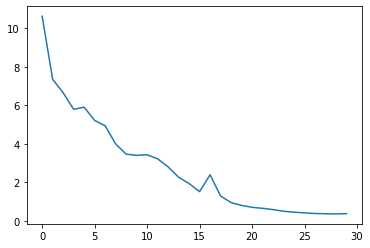

In [17]:
plt.plot(losses)

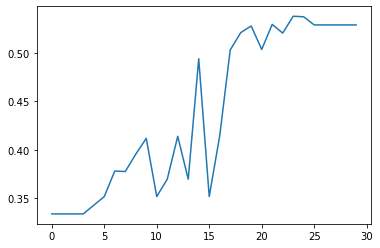

In [18]:
plt.plot(stats)

In [19]:
result = validate(raceNet, validationloader, accepted_values, 1)
print(result)
classify("me.jpg", raceNet, accepted_values)

Accuracy: 93.1953%
Accuracy for balanced classes: 49.52%
Best 3 accuracy: 100.0%
Best 3 accuracy for balanced classes: 100.0%
	Black	White	Asian
Black	50.0	47.5	2.5	
White	1.29	98.55	0.16	
Asian	5.88	94.12	0.0	

Black:	-0.4802742004394531
White:	1.4316895008087158
Asian:	-2.433272361755371



## Eredmények értékelése

A nemek osztályozásánál az ipar vezető cégeinek mesterséges intelligenciás megoldásaiban 87.9-93.7%-os pontosságot érnek el. Figyelembe véve, hogy nem csak sokéves tapasztalat, de jóval nagyobb adathalmaz, számítási kapacitás, memória és tőke birtokában dolgoznak, az eredményeim jónak számítanak. Nem jelenthetjük ki azonban, hogy utolértem az IBM 87.9%-os arcfelismerőjét, mert a felhasznált adathalmazom kisebb és nem tökéletesen reprezentatív: híres emberek vannak benne, így a nők, kissebbségiek és bizonyos embercsoportok alul vannak reprezentálva, míg mások - például a filmesek és színészek, akik az adatbázis 40%-át teszik ki - sokkal nagyobb arányban szerepelnek. Talán az eredmények ilyen jóságát magyarázza, hogy a híres emberek általában karakteresebb arcúak, esetleg a kicsi validációs adathalmaz (600-700 kép) miatt egyszerűen szerencsés értéket kaptam.
Megfigyelhető, hogy a férfiakat jobban felfedezi a hálóm, mint a nőket. Ez a jelenség abból fakad, hogy a férfiak arca jellemzően karakteresebb, ha valakin bajusz vagy szakáll van, az szinte biztosan férfi, míg nőkre ilyen vonások nincsenek. A jelenség megfigyelhető a profi neurális hálóknál is. A validációs adatban a férfiak túlsúlya pozitívan torzítja az eredményem. Ezt ellensúlyozom azzal, hogy a kapott eredményeket úgy súlyozom, hogy az osztály súlya fordítottan arányos a gyakoriságával, amit persze nem csak a nemek osztályozásánál teszek meg.

A munkakörök csoportosítása meglehetősen önkényes, de törekedtem arra, hogy a hasonló tulajdonságokat igénylő szakmák kerüljenek azonos csoportba. Ez feltételezi, hogy inkább a képességeink határozzák meg a leendő munkánkat, mint az álommunkánk a képességeinket. A pontos csoportosítások megtalálhatóak a dokumentációban.
Ebben a részben nem az osztályozási pontosság maximalizálását tekintettem első szempontnak, hanem azt, hogy mindenféle munkakört tippeljen, így az eredményt messzebbi, akár szociológiai témájú következtetések levonására is használhassuk. Ilyen eredmények például, hogy egyes területeken dolgozók nagyon hasonlóan vagy éppen különbözően szoktak kinézni, vagy hogy melyik területeknek a legfelismerhetőbb az arcuk.